# Final Project BDM 2053 - Big Data Algorithms and Statistic 01
Submitted by: Hemanta Rijal
#student ID: C0835075

# Project Description 
I use the fuelconsumption dataset from kaggle and which provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 

The Description of variables are as follows: 
Model:

* 4WD/4X4 = Four-wheel drive
* AWD = All-wheel drive
* FFV = Flexible-fuel vehicle
* SWB = Short wheelbase
* LWB = Long wheelbase
* EWB = Extended wheelbase

Transmission:

* A = automatic
* AM = automated manual
* AS = automatic with select shift
* AV = continuously variable
* M = manual
* 3 – 10 = Number of gears


Fuel type:

* X = regular gasoline
* Z = premium gasoline
* D = diesel
* E = ethanol (E85)
* N = natural gas

ENGINESIZE :  Size of Engine
CYLINDERS : No of Cylinders
FUELCONSUMPTION_CITY : Fuel Consumption by city
FUELCONSUMPTION_HWY : Fuel Consumption by highway
CO2EMISSIONS: the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving


### Import Library


In [1]:
import pandas as pd
import numpy as np

### Load Data

In [2]:
data = pd.read_csv('./FuelConsumption.csv')

In [3]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration 

In [4]:
#shape of the data
print("shape of data")
data.shape

shape of data


(1067, 13)

In [5]:
#checking the unique value from columns
data.nunique()

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

In [6]:
# we dont need model year in the value since all of  this data from 2014.
data = data.drop(['MODELYEAR'],axis=1)

In [7]:
data.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### checking Null Value in Data 

In [8]:
data.isnull().sum()


MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [9]:
print('No Missing Values in Data Set')

No Missing Values in Data Set


In [10]:
data.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MAKE                      1067 non-null   object 
 1   MODEL                     1067 non-null   object 
 2   VEHICLECLASS              1067 non-null   object 
 3   ENGINESIZE                1067 non-null   float64
 4   CYLINDERS                 1067 non-null   int64  
 5   TRANSMISSION              1067 non-null   object 
 6   FUELTYPE                  1067 non-null   object 
 7   FUELCONSUMPTION_CITY      1067 non-null   float64
 8   FUELCONSUMPTION_HWY       1067 non-null   float64
 9   FUELCONSUMPTION_COMB      1067 non-null   float64
 10  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 11  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 100.2+ KB


In [12]:
data.FUELTYPE.unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

###  Exploratory data analysis

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\forev\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of CO2EMISSIONS')

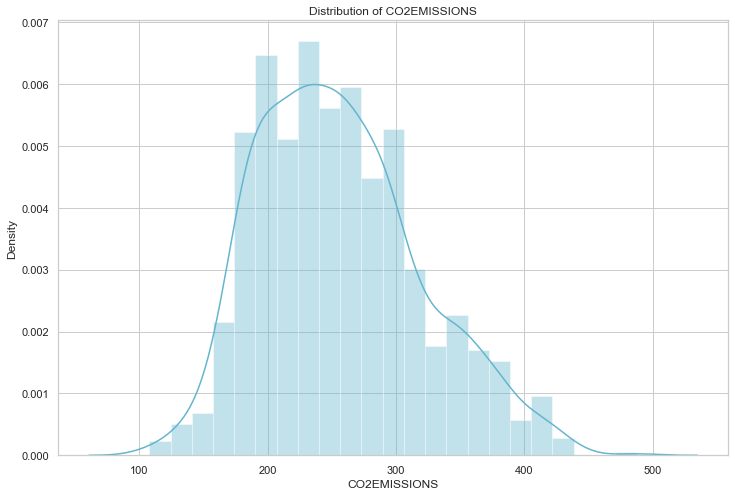

In [14]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(data['CO2EMISSIONS'], kde = True, color = 'c')
plt.title('Distribution of CO2EMISSIONS')

This distribution is almost normally distributed.

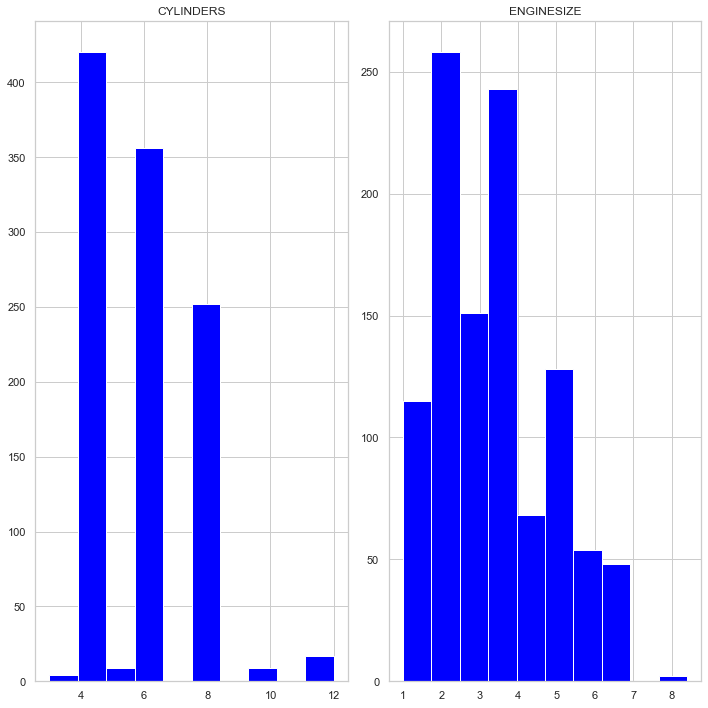

In [15]:
viz = data[['CYLINDERS','ENGINESIZE']]
viz.hist(color = 'Blue', figsize = (10, 10))
plt.tight_layout();
plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

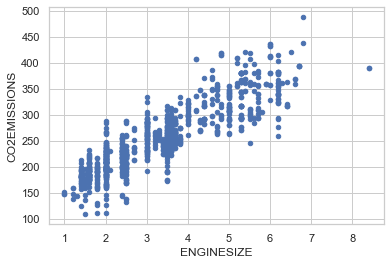

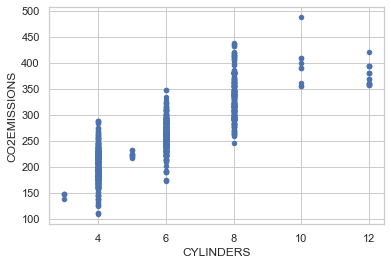

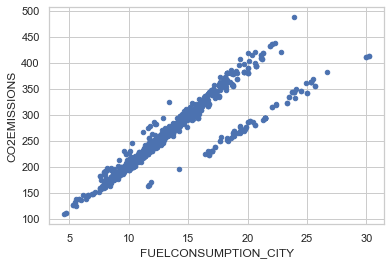

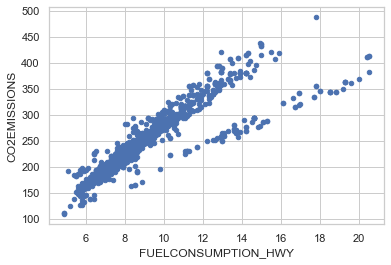

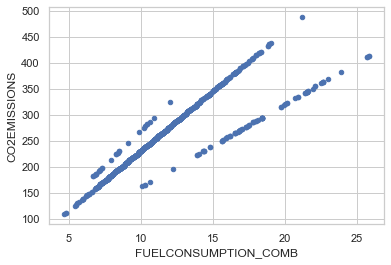

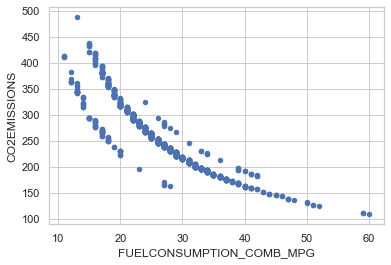

In [16]:
# this visualization helps to hind correlation between each columns
data.plot(kind='scatter', x='ENGINESIZE', y='CO2EMISSIONS')
data.plot(kind='scatter', x='CYLINDERS', y='CO2EMISSIONS')
data.plot(kind='scatter', x='FUELCONSUMPTION_CITY', y='CO2EMISSIONS')
data.plot(kind='scatter', x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS')
data.plot(kind='scatter', x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS')
data.plot(kind='scatter', x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS')
plt.show()

### Plotting Cateogrical variable

Text(0.5, 1.0, 'Carbon Emission by Make')

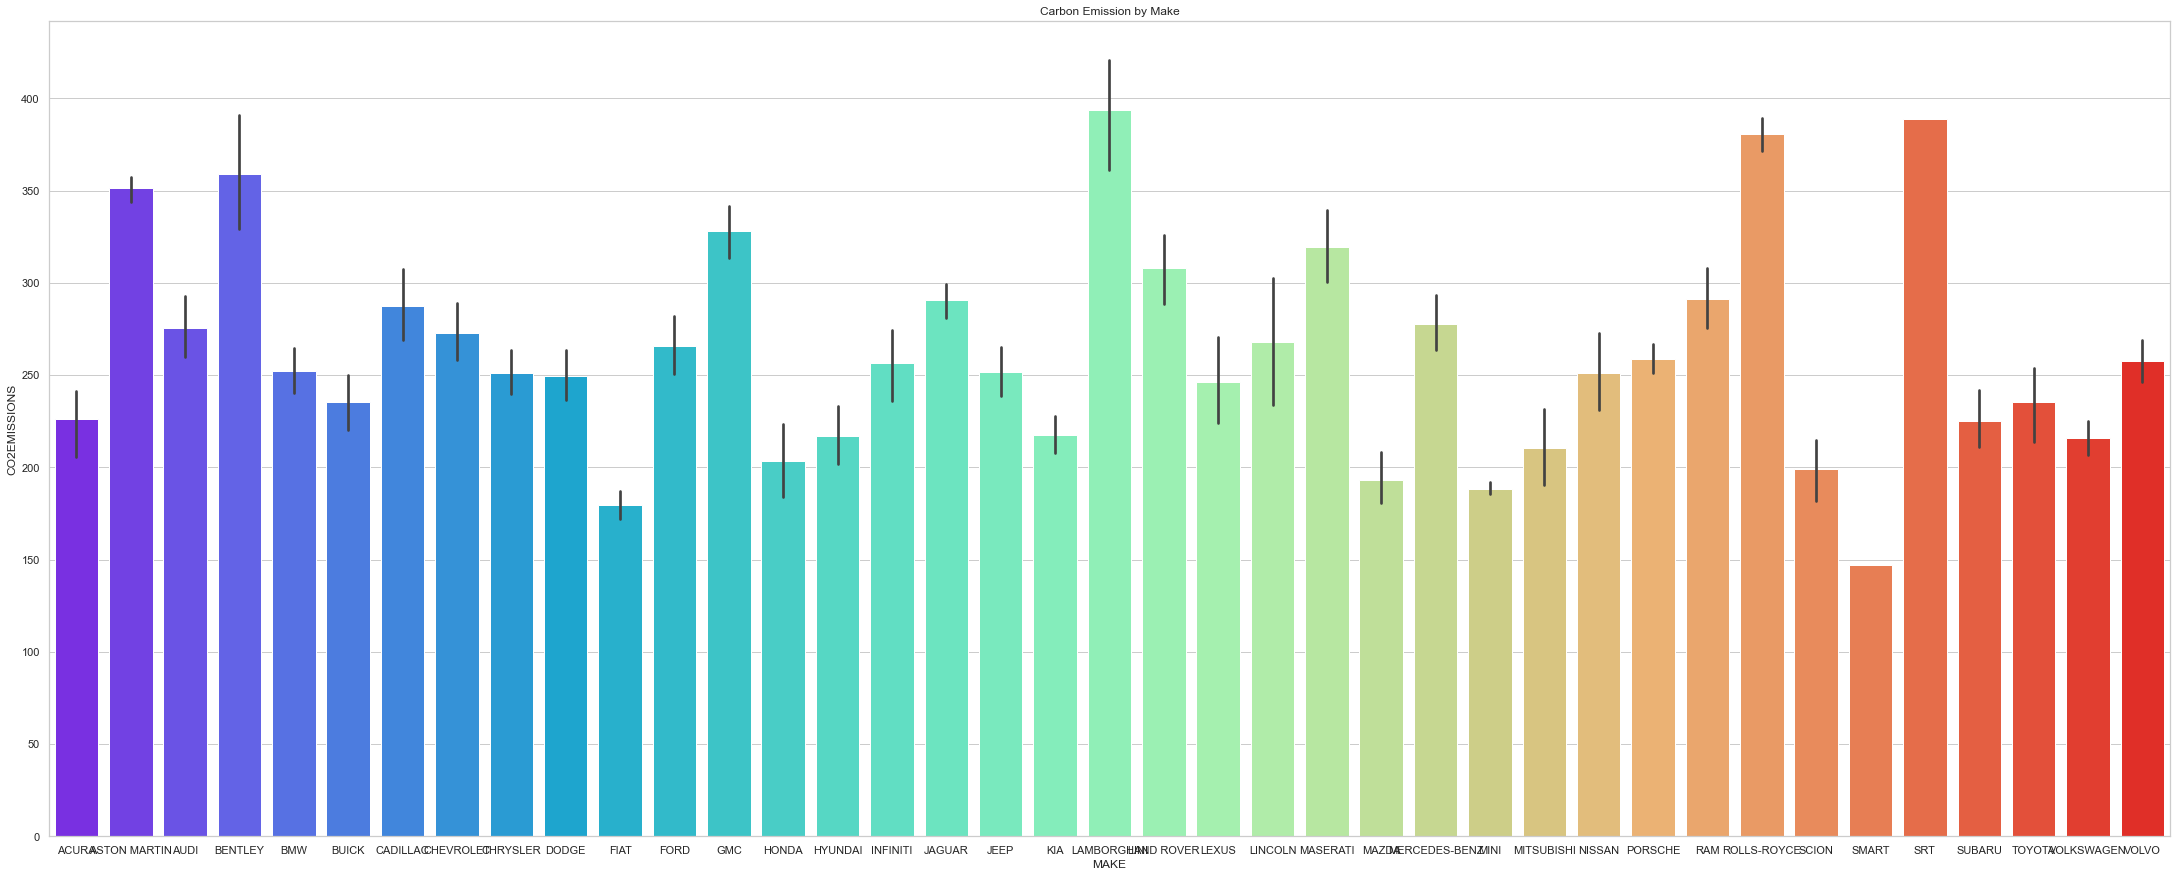

In [17]:
plt.figure(figsize=(38,15))
sns.barplot(x='MAKE',y='CO2EMISSIONS',data=data, palette='rainbow')
plt.title("Carbon Emission by Make")

Text(0.5, 1.0, 'Carbon Emission by Make')

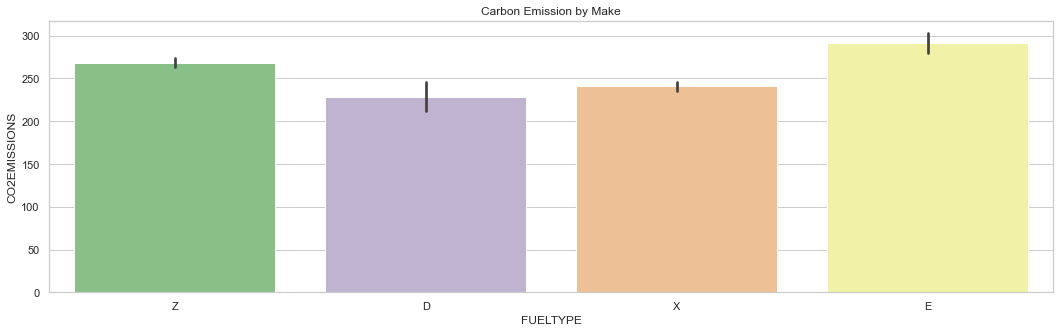

In [18]:
plt.figure(figsize=(18,5))
sns.barplot(x='FUELTYPE',y='CO2EMISSIONS',data=data, palette='Accent')
plt.title("Carbon Emission by Make")

Text(0.5, 1.0, 'Carbon Emission by Make')

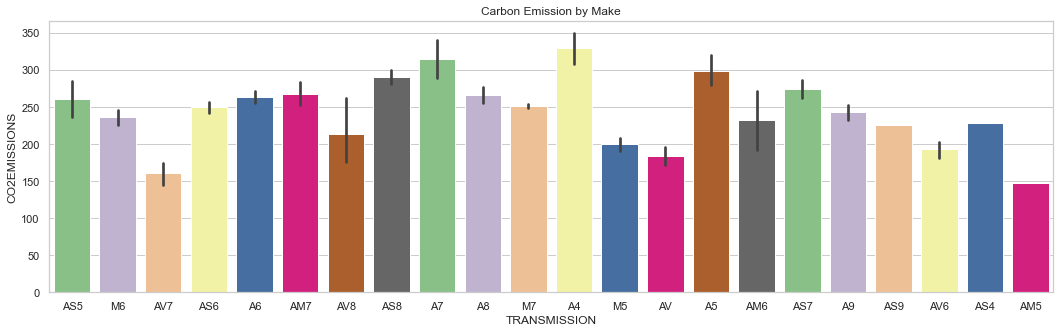

In [19]:
plt.figure(figsize=(18,5))
sns.barplot(x='TRANSMISSION',y='CO2EMISSIONS',data=data, palette='Accent')
plt.title("Carbon Emission by Make")

Text(0.5, 1.0, 'Carbon Emission by Make')

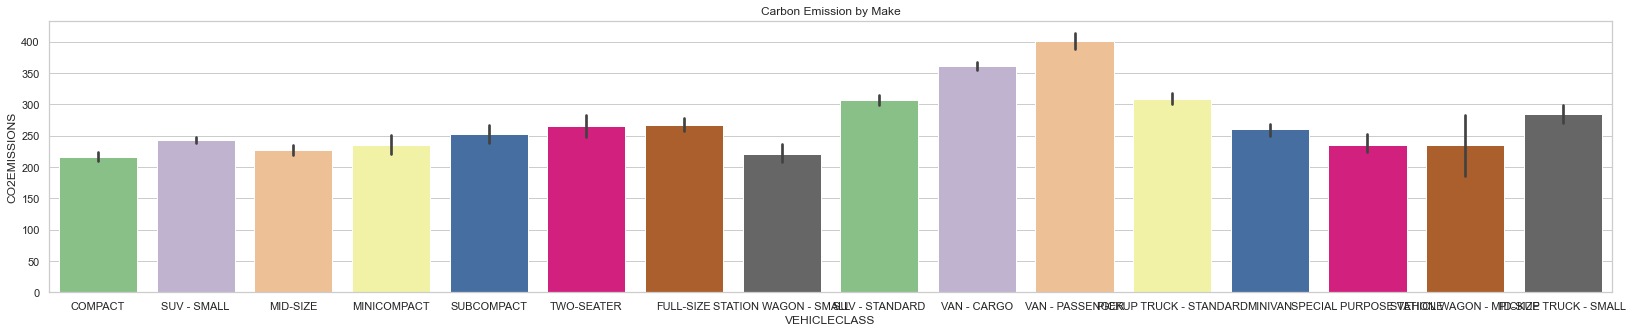

In [20]:
plt.figure(figsize=(28,5))
sns.barplot(x='VEHICLECLASS',y='CO2EMISSIONS',data=data, palette='Accent')
plt.title("Carbon Emission by Make")

## Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder  #encoding (we convert categorical variables into Numeric)
lb=LabelEncoder() 

In [22]:
data['FUELTYPE']=lb.fit_transform(data['FUELTYPE'])
data['MODEL'] = lb.fit_transform(data['MODEL'])
data['MAKE']= lb.fit_transform(data['MAKE'])
data['VEHICLECLASS']= lb.fit_transform(data['VEHICLECLASS'])
data['TRANSMISSION']= lb.fit_transform(data['TRANSMISSION'])

In [23]:
data

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,329,0,2.0,4,10,3,9.9,6.7,8.5,33,196
1,0,329,0,2.4,4,20,3,11.2,7.7,9.6,29,221
2,0,330,0,1.5,4,17,3,6.0,5.8,5.9,48,136
3,0,389,11,3.5,6,11,3,12.7,9.1,11.1,25,255
4,0,483,11,3.5,6,11,3,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,38,624,11,3.0,6,11,2,13.4,9.8,11.8,24,271
1063,38,624,11,3.2,6,11,2,13.2,9.5,11.5,25,264
1064,38,625,11,3.0,6,11,2,13.4,9.8,11.8,24,271
1065,38,625,11,3.2,6,11,2,12.9,9.3,11.3,25,260


### Finding Correleation between data

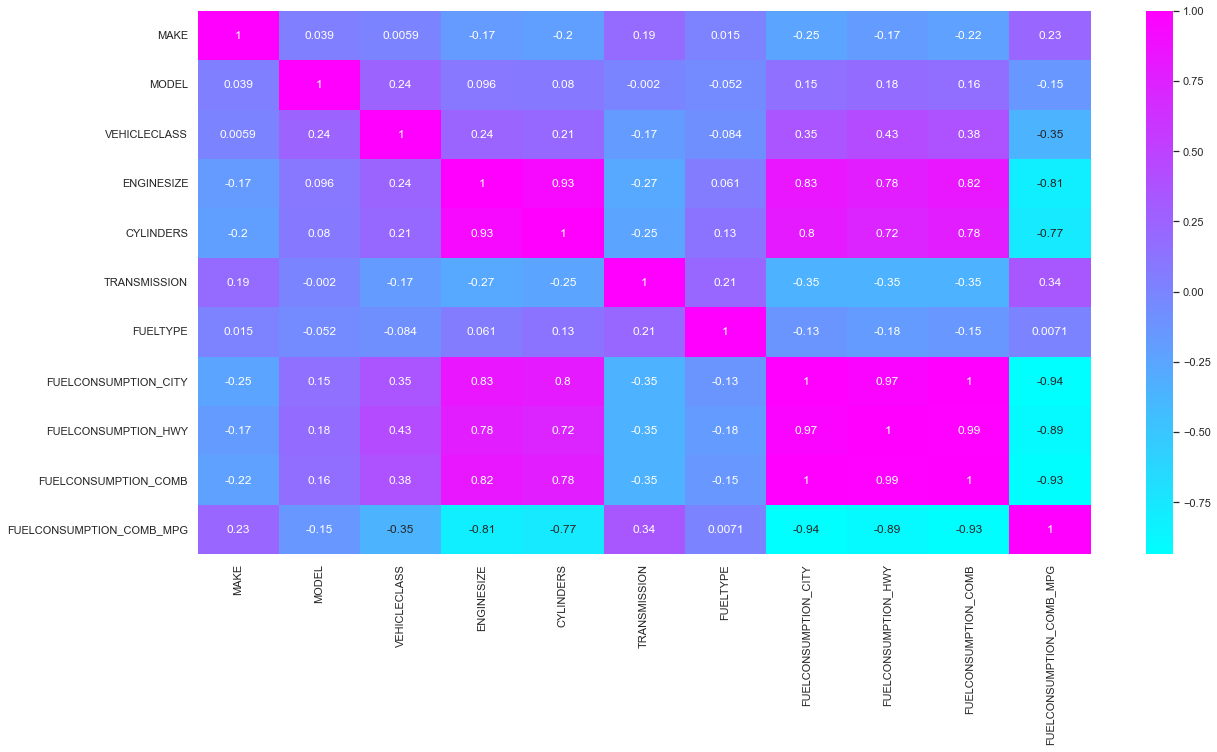

In [24]:
data2 = data.drop('CO2EMISSIONS',axis='columns')
#corelation
f, ax = plt.subplots(1, 1, figsize=(20, 10))
ax = sns.heatmap(data2.corr(), annot=True, cmap='cool')

#### We are removing the all correlation data which correlation is above 0.80

In [25]:
# Create correlation matrix
corr_matrix = data2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

to_drop

C:\Users\forev\AppData\Local\Temp\ipykernel_16592\354430140.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG']

In [26]:
# col_to_drop= ['FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CYLINDERS'];
data = data.drop(to_drop,axis=1)


In [27]:
X=data.drop('CO2EMISSIONS',axis='columns')
X.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,TRANSMISSION,FUELTYPE
0,0,329,0,2.0,10,3
1,0,329,0,2.4,20,3
2,0,330,0,1.5,17,3
3,0,389,11,3.5,11,3
4,0,483,11,3.5,11,3


standarize the range of functinality using standardScaler

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [29]:
y=data['CO2EMISSIONS']
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

### Split the dataset into train and test

In [30]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("Shape of training data", X_train.shape, y_train.shape)
print("Shape of testing data", X_test.shape, y_test.shape)

Shape of training data (853, 6) (853,)
Shape of testing data (214, 6) (214,)


#### Building Model and Prediction

##### 1. Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [32]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(X_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(X_test)


In [33]:
# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8233852506276346
794.874683496199


In [34]:
print("Score of Linear Regression Model after Cross Validation:",cross_val_score(LinearRegression,X, y,cv=5))

Score of Linear Regression Model after Cross Validation: [0.74521339 0.83370318 0.78771562 0.74509689 0.73296655]


##### 2. Random Forest Regressor:

In [35]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(X_test)


from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)


In [36]:
# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9113333939316943
399.05410327102805


In [37]:
print("Score of Random Forest Regression Model after Cross Validation:",cross_val_score(RandomForestRegressor,X, y,cv=5))

Score of Random Forest Regression Model after Cross Validation: [0.75446505 0.87723196 0.86817348 0.74074217 0.76990874]


##### 3. Lasso  Regressor:

In [38]:
# Lasso:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

# Prediction:
y_pred = Lasso.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8186947443615498
815.9848382083085


In [39]:
print("Score of Lasso Model after Cross Validation:",cross_val_score(RandomForestRegressor,X, y,cv=5))

Score of Lasso Model after Cross Validation: [0.74881441 0.87199177 0.86519952 0.76226913 0.77534865]


# Cross Validation Accuracy

On applying cross validation for 5 different value of cv we observe increase in value of accuracy of the model in each diffferent models. So, cross validation provides us the best accuracy of the model which can be achieved through hyperparameter tuning or choosing the different distribution of test and train dataset.

# Conclusion of the model:

On applying three models on the same training set of the data, we came to know that randomforestregressor works the best above all the model as, its r2 score is above 90%